# IMPORTING LIBRARIES

In [174]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import seaborn as sns


# IMPORTING DATASET

In [175]:
df=pd.read_csv("/content/bank-additional-full.csv",sep=';')
df.head()


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [176]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

# CHECKING FOR OUTLIERS

In [42]:
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


<Axes: >

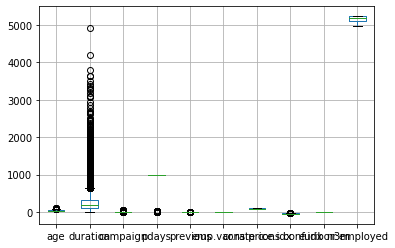

In [43]:
df.boxplot()

# TAKING CARE OF OUTLIERS

In [44]:
q1=df["duration"].quantile(0.25)
q3=df["duration"].quantile(0.75)
iqr=q3-q1
lower_lmt=q1-iqr*1.5
upper_lmt=q3+iqr*1.5
df=df[((df["duration"]>lower_lmt) & (df["duration"]<upper_lmt))]

In [45]:
q1=df["age"].quantile(0.25)
q3=df["age"].quantile(0.75)
iqr=q3-q1
lower_lmt=q1-iqr*1.5
upper_lmt=q3+iqr*1.5
df=df[((df["age"]>lower_lmt) & (df["age"]<upper_lmt))]

<Axes: >

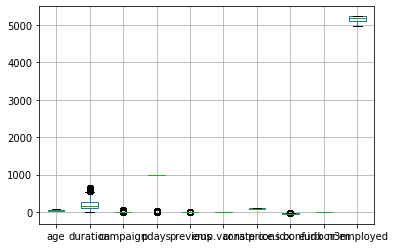

In [46]:
df.boxplot()

<Axes: >

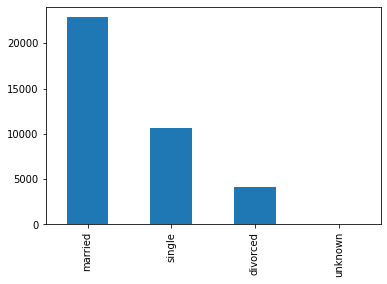

In [47]:
df["marital"].value_counts().plot(kind='bar')

In [50]:
df['y'].value_counts()

no     34871
yes     2913
Name: y, dtype: int64

In [51]:
df["loan"].value_counts()

no         31148
yes         5721
unknown      915
Name: loan, dtype: int64

# CHECKING FOR CORRELEATION

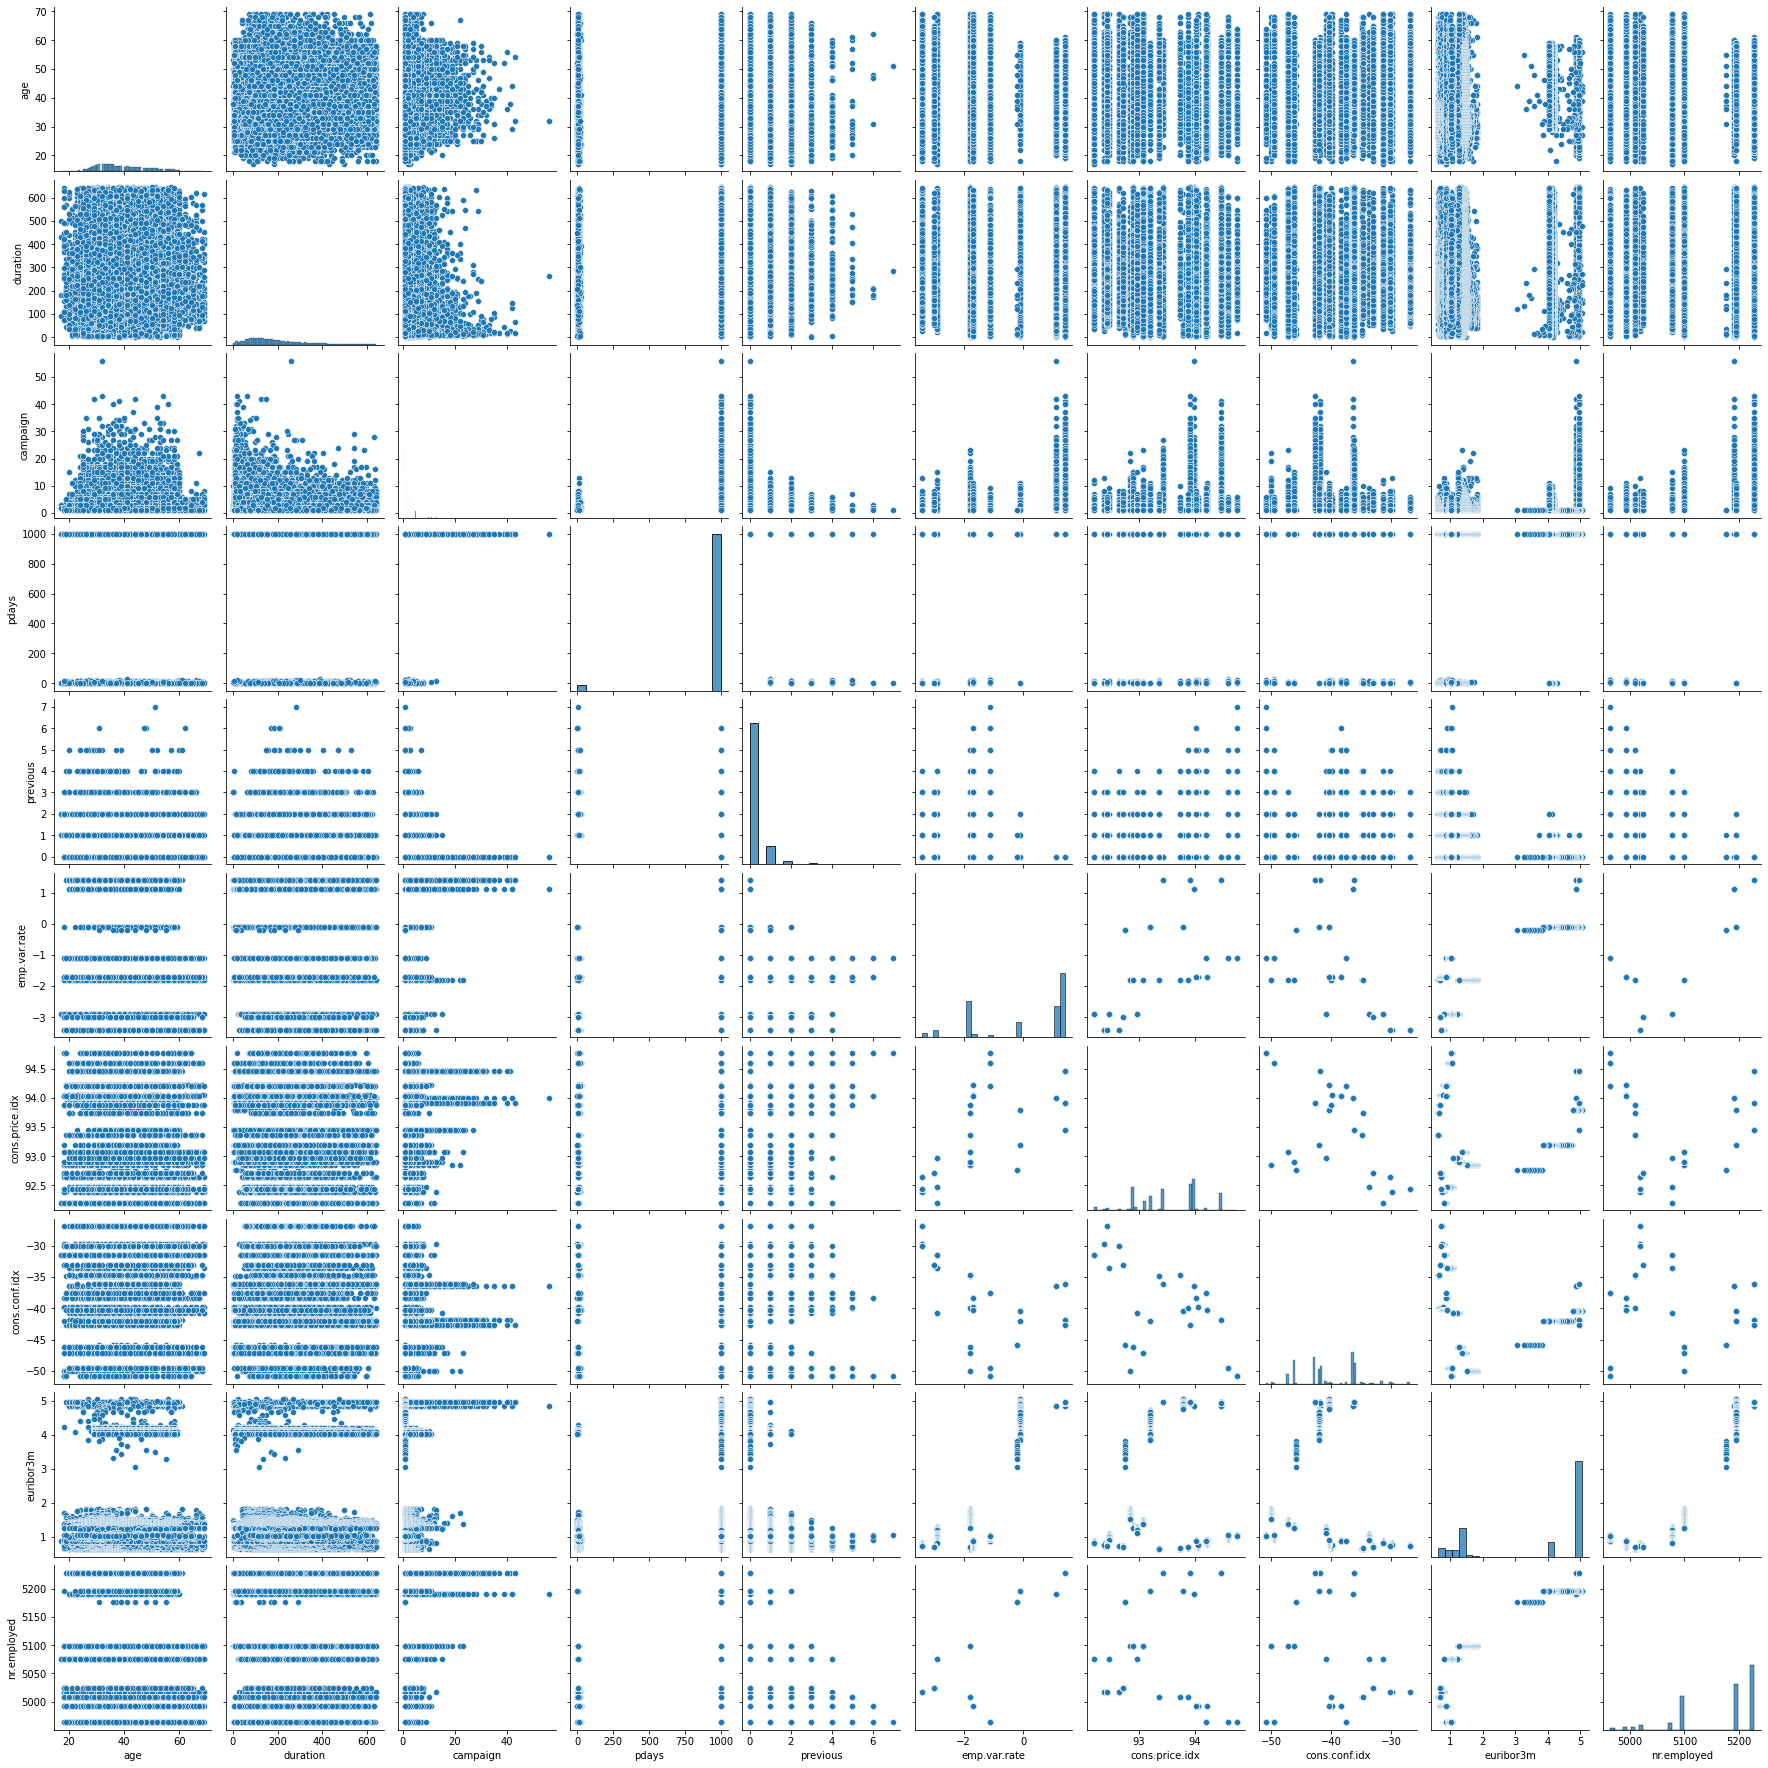

In [52]:
sns.pairplot(df)

<Axes: >

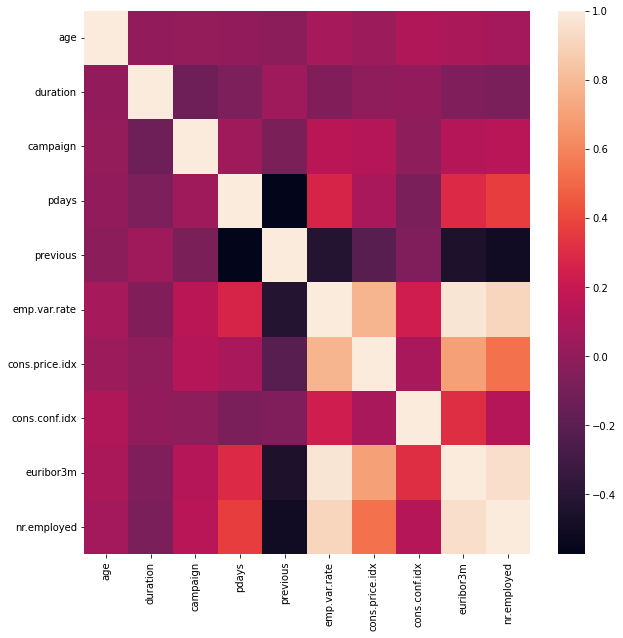

In [59]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr())



In [92]:
a=df.select_dtypes('object')
print(a.columns)

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'day_of_week', 'poutcome', 'y'],
      dtype='object')


In [62]:
from scipy.stats import chi2_contingency
def chi_sq(tab1,tab2):
  table=pd.crosstab(tab1,tab2)
  _,p,_,_= chi2_contingency(table)
  if p<= 0.05:
    print("Accept the Alternate Hypothesis",round(p,2))
  else:
    print("Failed to reject the Null hypothesis",round(p,2))
  return table


In [63]:
chi_sq(df["job"],df["y"])

Accept the Alternate Hypothesis 0.0


y,no,yes
job,,
admin.,8734,967
blue-collar,8265,297
entrepreneur,1275,70
housemaid,902,65
management,2489,208
retired,1017,188
self-employed,1211,90
services,3491,181
student,574,229


In [64]:
chi_sq(df["marital"],df["y"])

Accept the Alternate Hypothesis 0.0


y,no,yes
marital,,
divorced,3918,255
married,21351,1502
single,9539,1148
unknown,63,8


In [65]:
chi_sq(df["education"],df["y"])

Accept the Alternate Hypothesis 0.0


y,no,yes
education,,
basic.4y,3461,196
basic.6y,2015,86
basic.9y,5338,243
high.school,8135,648
illiterate,13,2
professional.course,4453,395
university.degree,10053,1186
unknown,1403,157


In [66]:
chi_sq(df["loan"],df["y"])

Failed to reject the Null hypothesis 0.16


y,no,yes
loan,,
no,28709,2439
unknown,850,65
yes,5312,409


In [70]:
chi_sq(df["day_of_week"],df["y"])

Accept the Alternate Hypothesis 0.0


y,no,yes
day_of_week,,
fri,6657,518
mon,7365,544
thu,7179,667
tue,6823,604
wed,6847,580


#Encoding

In [167]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [177]:
x=df.iloc[:,:-1]
y=df.iloc[:,-1]

In [178]:
x.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0


In [179]:
y.head()

0    no
1    no
2    no
3    no
4    no
Name: y, dtype: object

In [186]:
le=LabelEncoder()
y_en=le.fit_transform(y)

In [187]:
print(y_en)

[0 0 0 ... 0 1 0]


In [182]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [183]:
dfob=x.select_dtypes(object).columns
d_enc=pd.get_dummies(x,columns=dfob)
  

In [128]:
print(df.head())

   age  duration  campaign  pdays  previous  emp.var.rate  cons.price.idx  \
0   56       261         1    999         0           1.1          93.994   
1   57       149         1    999         0           1.1          93.994   
2   37       226         1    999         0           1.1          93.994   
3   40       151         1    999         0           1.1          93.994   
4   56       307         1    999         0           1.1          93.994   

   cons.conf.idx  euribor3m  nr.employed  ...  month_sep  day_of_week_fri  \
0          -36.4      4.857       5191.0  ...          0                0   
1          -36.4      4.857       5191.0  ...          0                0   
2          -36.4      4.857       5191.0  ...          0                0   
3          -36.4      4.857       5191.0  ...          0                0   
4          -36.4      4.857       5191.0  ...          0                0   

   day_of_week_mon  day_of_week_thu  day_of_week_tue  day_of_week_wed  \
0

In [185]:
d_enc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 63 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   age                            41188 non-null  int64  
 1   duration                       41188 non-null  int64  
 2   campaign                       41188 non-null  int64  
 3   pdays                          41188 non-null  int64  
 4   previous                       41188 non-null  int64  
 5   emp.var.rate                   41188 non-null  float64
 6   cons.price.idx                 41188 non-null  float64
 7   cons.conf.idx                  41188 non-null  float64
 8   euribor3m                      41188 non-null  float64
 9   nr.employed                    41188 non-null  float64
 10  job_admin.                     41188 non-null  uint8  
 11  job_blue-collar                41188 non-null  uint8  
 12  job_entrepreneur               41188 non-null 

In [188]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(d_enc,y_en,test_size=0.2,random_state=2)

In [189]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report

def report(x,y):
  print(accuracy_score(x,y))
  print(confusion_matrix(x,y))
  print(classification_report(x,y))

# LOGISTIC REGRESSION

In [212]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(x_train,y_train)
y_pred_lr_train=lr.predict(x_train)
y_pred_lr_test=lr.predict(x_test)

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [213]:
report(y_train,y_pred_lr_train)

0.9102579666160849
[[28455   775]
 [ 2182  1538]]
              precision    recall  f1-score   support

           0       0.93      0.97      0.95     29230
           1       0.66      0.41      0.51      3720

    accuracy                           0.91     32950
   macro avg       0.80      0.69      0.73     32950
weighted avg       0.90      0.91      0.90     32950



In [214]:
report(y_test,y_pred_lr_test)

0.9101723719349356
[[7146  172]
 [ 568  352]]
              precision    recall  f1-score   support

           0       0.93      0.98      0.95      7318
           1       0.67      0.38      0.49       920

    accuracy                           0.91      8238
   macro avg       0.80      0.68      0.72      8238
weighted avg       0.90      0.91      0.90      8238



# DECISION TREE

In [190]:
from sklearn.tree import DecisionTreeClassifier
dtc=DecisionTreeClassifier()
dtc.fit(x_train,y_train)

DecisionTreeClassifier()

In [191]:
y_pred_dtc_train=dtc.predict(x_train)

In [192]:
y_pred_dtc_test=dtc.predict(x_test)

In [193]:
report(y_train,y_pred_dtc_train)

1.0
[[29230     0]
 [    0  3720]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     29230
           1       1.00      1.00      1.00      3720

    accuracy                           1.00     32950
   macro avg       1.00      1.00      1.00     32950
weighted avg       1.00      1.00      1.00     32950



In [194]:
report(y_test,y_pred_dtc_test)

0.8894149065307113
[[6851  467]
 [ 444  476]]
              precision    recall  f1-score   support

           0       0.94      0.94      0.94      7318
           1       0.50      0.52      0.51       920

    accuracy                           0.89      8238
   macro avg       0.72      0.73      0.72      8238
weighted avg       0.89      0.89      0.89      8238



# RANDOM FORREST

In [195]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier(n_estimators=100,random_state=2)
rfc.fit(x_train,y_train)

RandomForestClassifier(random_state=2)

In [196]:
y_pred_rfc_train=rfc.predict(x_train)

In [197]:
y_pred_rfc_test=rfc.predict(x_test)

In [198]:
report(y_train,y_pred_rfc_train)

0.9999696509863429
[[29230     0]
 [    1  3719]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     29230
           1       1.00      1.00      1.00      3720

    accuracy                           1.00     32950
   macro avg       1.00      1.00      1.00     32950
weighted avg       1.00      1.00      1.00     32950



In [199]:
report(y_test,y_pred_rfc_test)

0.9132070890992959
[[7112  206]
 [ 509  411]]
              precision    recall  f1-score   support

           0       0.93      0.97      0.95      7318
           1       0.67      0.45      0.53       920

    accuracy                           0.91      8238
   macro avg       0.80      0.71      0.74      8238
weighted avg       0.90      0.91      0.91      8238



# SVM

In [200]:
from sklearn.svm import SVC
svc=SVC()
svc.fit(x_train,y_train)

SVC()

In [201]:
y_pred_svc_train=svc.predict(x_train)

In [202]:
y_pred_svc_test=svc.predict(x_test)

In [203]:
report(y_train,y_pred_svc_train)

0.8973899848254931
[[28737   493]
 [ 2888   832]]
              precision    recall  f1-score   support

           0       0.91      0.98      0.94     29230
           1       0.63      0.22      0.33      3720

    accuracy                           0.90     32950
   macro avg       0.77      0.60      0.64     32950
weighted avg       0.88      0.90      0.88     32950



In [204]:
report(y_test,y_pred_svc_test)

0.9002184996358339
[[7226   92]
 [ 730  190]]
              precision    recall  f1-score   support

           0       0.91      0.99      0.95      7318
           1       0.67      0.21      0.32       920

    accuracy                           0.90      8238
   macro avg       0.79      0.60      0.63      8238
weighted avg       0.88      0.90      0.88      8238



# KNN

In [207]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=202)
knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=202)

In [208]:
y_pred_knn_test=knn.predict(x_test)

In [209]:
y_pred_knn_train=knn.predict(x_train)

In [210]:
report(y_train,y_pred_knn_train)

0.91298937784522
[[28234   996]
 [ 1871  1849]]
              precision    recall  f1-score   support

           0       0.94      0.97      0.95     29230
           1       0.65      0.50      0.56      3720

    accuracy                           0.91     32950
   macro avg       0.79      0.73      0.76     32950
weighted avg       0.91      0.91      0.91     32950



In [211]:
report(y_test,y_pred_knn_test)

0.910536537994659
[[7075  243]
 [ 494  426]]
              precision    recall  f1-score   support

           0       0.93      0.97      0.95      7318
           1       0.64      0.46      0.54       920

    accuracy                           0.91      8238
   macro avg       0.79      0.71      0.74      8238
weighted avg       0.90      0.91      0.90      8238

